# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Andreu Picornell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Andreu Picornell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py"

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresión (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparación entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* Métricas (todas, y que aporta cada una)

* Conclusiones finales

## Implementación

### 1-Análisis de los datos

- Verificar valores nulos

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Rango de valores numéricos

In [ ]:
for col in ["age", "bmi", "children", "charges"]:
    print(f"{col}: min = {data[col].min()}, max = {data[col].max()}")

age: min = 18, max = 64
bmi: min = 15.96, max = 53.13
children: min = 0, max = 5
charges: min = 1121.8739, max = 63770.42801


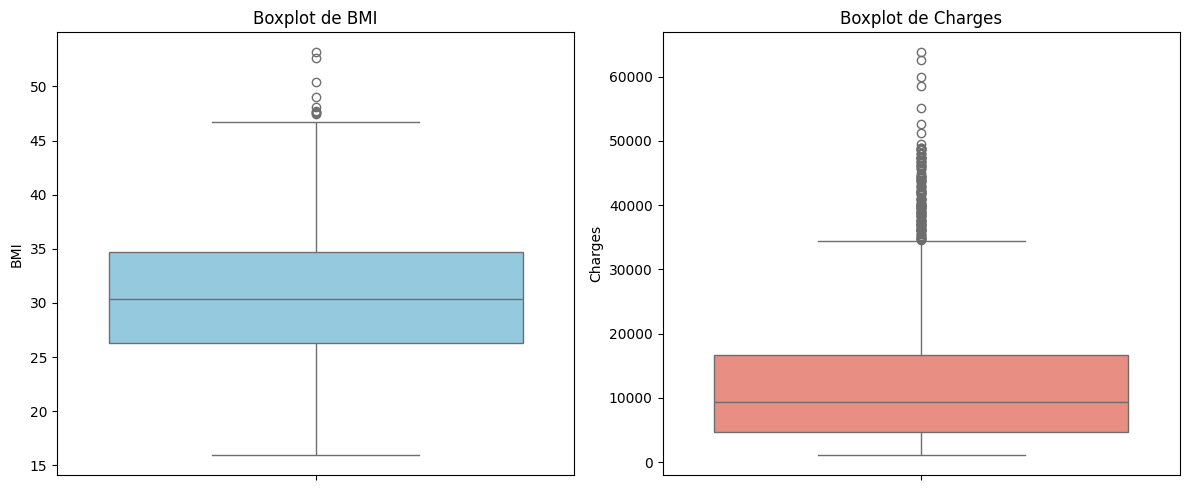

In [ ]:
# Ajustar el tamaño de las gráficas
plt.figure(figsize=(12, 5))

# Boxplot para BMI
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.boxplot(y=data["bmi"], color="skyblue")
plt.title("Boxplot de BMI")
plt.ylabel("BMI")

# Boxplot para Charges
plt.subplot(1, 2, 2)  # Segundo gráfico en la misma fila
sns.boxplot(y=data["charges"], color="salmon")
plt.title("Boxplot de Charges")
plt.ylabel("Charges")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

- Valores únicos en columnas categóricas

In [ ]:
for col in ["sex", "smoker", "region"]:
    print(f"{col}: {data[col].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


### 2-Preprocesamiento de datos

- Convertir variables categóricas

In [ ]:
data = pd.get_dummies(data, drop_first=True)

- Dividir variables independientes (X) y dependientes (y)

In [ ]:
X = data.drop("charges", axis=1)
y = data["charges"]

### 3-Definir el modelo de regresión

In [ ]:
modelo = RandomForestRegressor(random_state=42)

### 4-Evaluar el modelo

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Definir las métricas
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': 'r2', 
    'mape': make_scorer(mean_absolute_percentage_error)
}

# Cross Validation
resultados = cross_validate(modelo, X, y, cv=5, scoring=scoring)

print(f"Error Cuadrático Medio (MSE): {np.mean(resultados['test_mse'])}")
print(f"Error Absoluto Medio (MAE): {np.mean(resultados['test_mae'])}")
print(f"Coeficiente de Determinación (R²): {np.mean(resultados['test_r2'])}")
print(f"Error Porcentual Absoluto Medio (MAPE): {np.mean(resultados['test_mape'])}")

Error Cuadrático Medio (MSE): 23771590.528972615
Error Absoluto Medio (MAE): 2710.2137577582366
Coeficiente de Determinación (R²): 0.8360452931972272
Error Porcentual Absoluto Medio (MAPE): 32.407227171791256


- MSE (Mean Squared Error): Promedio de los errores al cuadrado, penaliza más los errores grandes.
- MAE (Mean Absolute Error): Promedio de los errores absolutos, fácil de interpretar.
- R² (Coeficiente de Determinación): Mide qué porcentaje de la variabilidad de los datos es explicado por el modelo.
- MAPE (Mean Absolute Percentage Error): Promedio del error absoluto como porcentaje de los valores reales.

# Conclusiones

A lo largo de este análisis, se probaron varios modelos de regresión para determinar cuál ofrece el mejor rendimiento. Los modelos evaluados fueron **Lasso**, **Regresión Lineal**, **Ridge**, **Árbol de Decisión** y **Random Forest**. A continuación se presentan los resultados obtenidos de cada modelo y las razones por las que **Random Forest** fue seleccionado como la mejor opción.

## Resultados de los Modelos

### **1. Lasso**
- **MSE**: 36,913,192.03
- **MAE**: 4,197.76
- **R²**: 0.7469
- **MAPE**: 42.42%


### **2. Regresión Lineal**
- **MSE**: 36,913,329.69
- **MAE**: 4,197.72
- **R²**: 0.7469
- **MAPE**: 42.42%


### **3. Ridge**
- **MSE**: 36,913,100.05
- **MAE**: 4,198.69
- **R²**: 0.7469
- **MAPE**: 42.43%


### **4. Árbol de Decisión (Decision Tree)**
- **MSE**: 43,554,977.80
- **MAE**: 3,133.66
- **R²**: 0.6991
- **MAPE**: 35.73%


### **5. Random Forest**
- **MSE**: 23,771,590.53
- **MAE**: 2,710.21
- **R²**: 0.8360
- **MAPE**: 32.41%

**Conclusión**: **Random Forest** demostró ser el modelo más destacado:

1. **Mejor ajuste a los datos** con el **MSE más bajo**, lo que sugiere una penalización de errores cuadráticos más eficiente.
2. **Mayor precisión** con el **MAE más bajo**, lo que lo convierte en el modelo con el menor error absoluto promedio.
3. **Mejor capacidad explicativa** con el **R² más alto**, lo que demuestra que **Random Forest** es el mejor en términos de explicabilidad del modelo.
4. **Mejor desempeño porcentual** con el **MAPE más bajo**, lo que refuerza su precisión relativa.

Por estos motivos, **Random Forest** fue seleccionado como el modelo final, ya que demostró ser el más robusto y preciso al abordar el problema de regresión.
